### **Modular Design**

**What it is:**
Keeping **preprocessing, modeling, and evaluation in separate blocks** of code.

Each part of the pipeline is reusable, testable, and adjustable.

**Why it's good:**

* Easier to debug and improve
* Flexible for switching models or features
* Prepares the project for deployment or scaling

### **Key Steps in data transforming and cleaning:**

1. **Loading Data:**

   * Reading data from different sources 

2. **Merging and Joining:**

   * Combining multiple datasets into one.

3. **Handling Missing Values:**

   * Dealing with null or missing data.

4. **Fixing Data Types:**

   * Ensuring that columns like dates, prices, and categories have the correct data type.

5. **Cleaning Values:**

   * Removing duplicates, fixing typos, correcting inconsistent formats.

6. **Feature Engineering:**

   * Creating new features and transforming existing ones to make them more useful for analysis.

7. **Filtering and Subsetting:**

   * Removing irrelevant rows or columns and focusing on useful data.


### **Goal of the section**

To turn messy, inconsistent raw data into a clean, reliable dataset that can be used confidently for **analysis**, **visualization**, or **machine learning**.


### Data Load Summary

- **Dataset:** `DKHousingPricesSample100k.csv`
- **Status:** Loaded successfully
- **Shape:** 100,000 rows
- **Preview:**
  - Displayed using `homes.head()`


In [1]:
import pandas as pd
import os

basePath = r"C\GitHub\AIExam\Data"
filePath = os.path.join(basePath, "DKHousingPricesSample100k.csv")

homes = pd.read_csv(filePath)
print(homes.head())


         date quarter  house_id house_type    sales_type  year_build  \
0  2024-10-24  2024Q4        16      Villa  regular_sale        1997   
1  2024-10-24  2024Q4        13  Apartment  regular_sale        1885   
2  2024-10-23  2024Q4        60      Villa  regular_sale        1949   
3  2024-10-23  2024Q4        29      Villa  regular_sale        2001   
4  2024-10-22  2024Q4        92  Apartment  regular_sale        1965   

   purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  \
0         6500000                                 -3.0         5  142.0   
1         3400000                                  0.0         2   46.0   
2         4550000                                 -4.0         4  112.0   
3         1630000                                -12.0         4  186.0   
4         1975000                                -10.0         3   82.0   

   sqm_price                          address  zip_code             city  \
0  45774.650                     SpÃ¦tte

### Data Summary 
describe() method provied a quick statistical summary of the dataset. 
It provides descriptive statistics for each numeric column, including the count, mean, standard deviation, minimum, maximum, and quartiles. 
This helps us understand the distribution, spread, and central tendencies of the data.

In [2]:
homes.describe()

house_id     year_build  purchase_price  \
count  1.000000e+05  100000.000000    1.000000e+05   
mean   7.531364e+05    1955.078530    1.925992e+06   
std    4.348902e+05      45.703585    1.777832e+06   
min    1.300000e+01    1000.000000    2.502000e+05   
25%    3.770722e+05    1931.000000    8.000000e+05   
50%    7.511035e+05    1966.000000    1.400000e+06   
75%    1.128904e+06    1980.000000    2.450000e+06   
max    1.507901e+06    2024.000000    4.595500e+07   

       %_change_between_offer_and_purchase       no_rooms            sqm  \
count                        100000.000000  100000.000000  100000.000000   
mean                             -2.084740       4.375790     129.387820   
std                               4.852926       1.661686      57.170619   
min                             -49.000000       1.000000      26.000000   
25%                              -3.000000       3.000000      89.000000   
50%                               0.000000       4.000000     123.000000   
75%                               0.000000       5.000000     160.000000   
max                              49.000000      15.000000     984.000000   

           sqm_price       zip_code  nom_interest_rate%  dk_ann_infl_rate%  \
count  100000.000000  100000.000000       100000.000000       99923.000000   
mean    16406.648074    5951.612680            1.679263           1.927025   
std     13655.184405    2369.938171            2.048078           1.638440   
min       374.549800    1051.000000            0.000000           0.250000   
25%      6792.940775    4000.000000            0.000000           0.790000   
50%     12070.707000    5970.000000            0.750000           1.850000   
75%     21343.201500    8250.000000            3.250000           2.340000   
max     75000.000000    9990.000000            9.500000           7.700000   

       yield_on_mortgage_credit_bonds%  
count                     99923.000000  
mean                          4.107445  
std                           2.194428  
min                           1.100000  
25%                           2.120000  
50%                           4.340000  
75%                           5.500000  
max                          10.140000

###  Insights From Data###

Year Built: The average house was built around 1955, with a wide spread (some as early as year 1000 â€” likely a data error).

Purchase Price: Mean is ~1.93 million DKK, but values go up to 45.96 million DKK â€” significant price range.

% Change in Offer vs Purchase: On average, homes were bought for ~2% less than offered, with some bought for 49% less or more.

Number of Rooms: Most houses have around 4 rooms, ranging from 1 to 15.

Size (sqm): Typical home is about 129 mÂ², but ranges from 26 to 984 mÂ².

sqm Price: Average is 16,406 DKK/mÂ², but there's large variance from 375 to 75,000 DKK/mÂ², suggesting a wide market range.

Interest & Inflation Rates: These show macroeconomic indicators, helpful for financial modeling, nominal interest rate ranges from 0 to 9.5%.

### Why This Matters

- we can spot outliers.

- It guides data cleaning.

- Supports feature engineering for example, categorizing homes into price bands.

- Offers early insight for visualizations or predictive models.

### **1. Checking for Missing Values**  
We check for any missing values in the dataset:

In [3]:
homes.count()

date                                   100000
quarter                                100000
house_id                               100000
house_type                             100000
sales_type                             100000
year_build                             100000
purchase_price                         100000
%_change_between_offer_and_purchase    100000
no_rooms                               100000
sqm                                    100000
sqm_price                              100000
address                                100000
zip_code                               100000
city                                    99989
area                                   100000
region                                 100000
nom_interest_rate%                     100000
dk_ann_infl_rate%                       99923
yield_on_mortgage_credit_bonds%         99923
dtype: int64

# **Data Cleaning and Feature Selection**

To optimize our dataset, we perform the following steps:

1. Drop the `city` column  
   - Since we have `zip_code`, the `city` column is redundant and can be removed.

2. Fill missing values for `dk_ann_infl_rate%` and `yield_on_mortgage_credit_bonds%` with their mean  
   - These columns contain 77 missing values. Instead of dropping them, we replace them with the mean value of each column.

### **1. Dropping Redundant Columns**
Since the `zip_code` column, which uniquely identifies the location, the `city` column is considered **redundant**. Rather than filling in missing values in `city`, we remove it to avoid duplication and keep the dataset clean and consistent.


In [4]:
homes = homes.drop(columns=['city'])
homes['dk_ann_infl_rate%'] = homes['dk_ann_infl_rate%'].fillna(homes['dk_ann_infl_rate%'].median())
homes['yield_on_mortgage_credit_bonds%'] = homes['yield_on_mortgage_credit_bonds%'].fillna(homes['yield_on_mortgage_credit_bonds%'].median())
print(homes.isnull().sum())



date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
area                                   0
region                                 0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
dtype: int64


In [5]:
homes.columns

Index(['date', 'quarter', 'house_id', 'house_type', 'sales_type', 'year_build',
       'purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'address', 'zip_code', 'area', 'region',
       'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%'],
      dtype='object')

### Why Merging Economic Data is Important

Merging the economic data with our main housing dataset provides valuable context and improves the quality of analysis and predictions.

- **Enriches Features**: Adds market-level indicators like average price per mÂ² and quarterly changes to support more accurate models.
- **Aligns with Time**: Both datasets use the same quarterly structure, enabling precise temporal analysis.
- **Market Context**: Helps compare individual sale prices to general market trends for better insights.
- **Improves Interpretability**: Makes model outputs easier to explain with real-world economic context.
- **Supports All Learning Types**: Useful for both supervised (price prediction) and unsupervised (clustering market behavior) approaches.


In [6]:
basePath = r"\GitHub\AIExam\Data"
filePath = os.path.join(basePath, "economic_data.xlsx")
economic_data = pd.read_excel(filePath)
economic_data.rename(columns={
    'Price per mÂ²': 'price_per_m2_econ',
    'Change (from previous quarter)': 'quarterly_change%',
    'Change from 1 year ago': 'yearly_change%',
    'Change since 1992': 'change_since_1992%',
    'house_type': 'house_type'
}, inplace=True)
print(economic_data.columns)
merged_data = pd.merge(homes, economic_data, on=['quarter', 'house_type'], how='left')
print(merged_data.head())


Index(['quarter', 'price_per_m2_econ', 'quarterly_change%', 'yearly_change%',
       'change_since_1992%', 'house_type'],
      dtype='object')
         date quarter  house_id house_type    sales_type  year_build  \
0  2024-10-24  2024Q4        16      Villa  regular_sale        1997   
1  2024-10-24  2024Q4        13  Apartment  regular_sale        1885   
2  2024-10-23  2024Q4        60      Villa  regular_sale        1949   
3  2024-10-23  2024Q4        29      Villa  regular_sale        2001   
4  2024-10-22  2024Q4        92  Apartment  regular_sale        1965   

   purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  ...  \
0         6500000                                 -3.0         5  142.0  ...   
1         3400000                                  0.0         2   46.0  ...   
2         4550000                                 -4.0         4  112.0  ...   
3         1630000                                -12.0         4  186.0  ...   
4         1975000      

In [7]:
print(merged_data.isin(['NA', 'N/A', 'None', '']).sum())


date                                   0
quarter                                0
house_id                               0
house_type                             0
sales_type                             0
year_build                             0
purchase_price                         0
%_change_between_offer_and_purchase    0
no_rooms                               0
sqm                                    0
sqm_price                              0
address                                0
zip_code                               0
area                                   0
region                                 0
nom_interest_rate%                     0
dk_ann_infl_rate%                      0
yield_on_mortgage_credit_bonds%        0
price_per_m2_econ                      0
quarterly_change%                      0
yearly_change%                         0
change_since_1992%                     0
dtype: int64


## Merging Number of Homes Sold

Merging with the main dataset adds valuable 

* **Market Activity**: Knowing how many homes were sold each quarter helps us understand supply and demand dynamics.
* **Trend Analysis**: The included changes from previous quarters and years enable us to detect seasonal patterns and long-term trends.
* **Enhanced Features**: These new variables can improve the performance of both supervised and unsupervised learning models by providing extra economic signals.
* **Deeper Insights**: We can explore questions like how sales volume influences price, or whether certain house types are more sensitive to market shifts.

This enriched dataset leads to more informed analysis and more robust predictive modeling.



In [8]:
basePath = r"\Documents\GitHub\AIExam\Data"
filePath = os.path.join(basePath, "number_Home_sold.xlsx")
number_sold = pd.read_excel(filePath)

number_sold = number_sold.rename(columns={
    "Number of home sold": "homes_sold",
    "Change (from previous quarter)": "sold_q_change",
    "Change from 1 year ago": "sold_yoy_change",
    "Change since 1992": "sold_change_since_1992"
})

final_df = merged_data.merge(number_sold, on=["quarter", "house_type"], how="left")



### We check for any missing values in the dataset:  
we discovered that the following columns contain 3,696 missing values:
-sold_q_change
- sold_yoy_change
-sold_change_since_1992

In [9]:
print(final_df.isnull().sum())

date                                      0
quarter                                   0
house_id                                  0
house_type                                0
sales_type                                0
year_build                                0
purchase_price                            0
%_change_between_offer_and_purchase       0
no_rooms                                  0
sqm                                       0
sqm_price                                 0
address                                   0
zip_code                                  0
area                                      0
region                                    0
nom_interest_rate%                        0
dk_ann_infl_rate%                         0
yield_on_mortgage_credit_bonds%           0
price_per_m2_econ                         0
quarterly_change%                         0
yearly_change%                            0
change_since_1992%                        0
homes_sold                      

### Filtering to Identify Missing Rows
- To understand where the missing values occur, we filtered the dataset by year:
- This confirmed that the missing data is limited to years 1992â€“1994, where no homes_sold statistics are available.
## Conclusion
By identifying and isolating these rows, we ensure:

- Transparent handling of missing data.

- Preservation of early-year data for trend analysis.

-Flexibility to impute or flag missing values depending on modeling needs.



In [10]:
final_df['date'] = pd.to_datetime(final_df['date'], errors='coerce')

# Now you can use .dt
missing_sales_data = final_df[final_df['homes_sold'].isnull()]
print(missing_sales_data['date'].dt.year.value_counts().sort_index())



date
1992    1181
1993    1244
1994    1271
Name: count, dtype: int64


### We chose to **retain rows with missing `homes_sold` change values** and **leave them as NaN**, since:
- The rows (1992â€“1994) contain valuable housing data.
- These features are not available historically, and estimating them could introduce error.
- Tree-based models can handle missing values natively.
## Why Not Impute with 0?
- A value of 0 would imply no change, which is misleading.
- It introduces bias, especially in time-series or trend-based models.
-These columns represent percentage changes, and assigning 0 assumes market stability that never existed.
## Why Not Use the Mean?
- The mean assumes a consistent trend across time, which is not true in housing economics.
- Early 1990s may have had very different market conditions compared to later years.
-This could distort historical patterns and impact model performance.

 ### **Handling large Range in `purchase_price`**

When we inspect the dataset with `.describe()`.
We notice that the `purchase_price` column has a large range, from: 
The minimum value (250,200) is 250 thousand.
The maximum value (45,955,000) is 45.96 million.
This large range suggests that there may be outliers or extreme values in the dataset, which could distort our analysis and model performance.

1. Checking the Description of the `purchase_price` Column  
First, we run the `.describe()` function to inspect the key statistics:


### Key Observations
1. Date Range
date ranges from 1992-01-05 to 2024-10-24.

We have data covering 32 years, ideal for both supervised (regression/classification) and unsupervised (clustering/trend) analysis.

2. Missing Values
homes_sold and related fields have ~3,700 missing values (out of 100,000 rows), caused by missing records before 1995.

This impacts time-based trend analysis.

3. Distribution Insights
Year built ranges from 1000 (likely a data entry issue) to 2024.

Price per mÂ² and purchase_price have wide variance â€“ suggest potential outliers or skewed distribution.

% change between offer and purchase spans from -49% to +49%, showing a high negotiation range.
## Dealing with Wide Ranges in purchase_price
The purchase_price column spans a wide range of values, from relatively low prices like 250,200 DKK to very high prices up to 45,955,000 DKK.
When a dataset contains such large disparities, it can be difficult to visualize patterns or trends on a linear scale, because:

- High values dominate the axis, compressing the appearance of lower-value data.

- Important insights from lower or middle segments of the market may be hidden.

# Solution: Log Transformation
To make visualizations and patterns more interpretable, we can apply a logarithmic transformation to the purchase_price:
                                                           

In [11]:
final_df.dtypes
final_df.describe()

date      house_id     year_build  \
count                      100000  1.000000e+05  100000.000000   
mean   2012-10-28 09:36:46.656000  7.531364e+05    1955.078530   
min           1992-01-05 00:00:00  1.300000e+01    1000.000000   
25%           2005-09-21 00:00:00  3.770722e+05    1931.000000   
50%           2015-03-31 00:00:00  7.511035e+05    1966.000000   
75%           2020-09-24 00:00:00  1.128904e+06    1980.000000   
max           2024-10-24 00:00:00  1.507901e+06    2024.000000   
std                           NaN  4.348902e+05      45.703585   

       purchase_price  %_change_between_offer_and_purchase       no_rooms  \
count    1.000000e+05                        100000.000000  100000.000000   
mean     1.925992e+06                            -2.084740       4.375790   
min      2.502000e+05                           -49.000000       1.000000   
25%      8.000000e+05                            -3.000000       3.000000   
50%      1.400000e+06                             0.000000       4.000000   
75%      2.450000e+06                             0.000000       5.000000   
max      4.595500e+07                            49.000000      15.000000   
std      1.777832e+06                             4.852926       1.661686   

                 sqm      sqm_price       zip_code  nom_interest_rate%  \
count  100000.000000  100000.000000  100000.000000       100000.000000   
mean      129.387820   16406.648074    5951.612680            1.679263   
min        26.000000     374.549800    1051.000000            0.000000   
25%        89.000000    6792.940775    4000.000000            0.000000   
50%       123.000000   12070.707000    5970.000000            0.750000   
75%       160.000000   21343.201500    8250.000000            3.250000   
max       984.000000   75000.000000    9990.000000            9.500000   
std        57.170619   13655.184405    2369.938171            2.048078   

       dk_ann_infl_rate%  yield_on_mortgage_credit_bonds%  price_per_m2_econ  \
count      100000.000000                    100000.000000      100000.000000   
mean            1.926966                         4.107624       15045.811540   
min             0.250000                         1.100000        3851.000000   
25%             0.790000                         2.120000       11131.000000   
50%             1.850000                         4.340000       14111.000000   
75%             2.340000                         5.500000       17334.000000   
max             7.700000                        10.140000       35736.000000   
std             1.637811                         2.193592        6845.451651   

       quarterly_change%  yearly_change%  change_since_1992%    homes_sold  \
count      100000.000000   100000.000000       100000.000000  96304.000000   
mean            0.014219        0.055232            2.296796   6523.897450   
min            -0.116000       -0.186000           -0.089000    523.000000   
25%            -0.003000        0.017000            1.756000   2602.000000   
50%             0.012000        0.045000            2.341000   6870.000000   
75%             0.031000        0.094000            3.023000  10167.000000   
max             0.081000        0.309000            5.140000  14514.000000   
std             0.026609        0.072883            1.158630   4021.495455   

       sold_q_change  sold_yoy_change  sold_change_since_1992  
count   96304.000000     96304.000000            96304.000000  
mean        0.042659         0.044113                0.628039  
min        -0.470000        -0.552000               -0.453000  
25%        -0.099000        -0.069000                0.064000  
50%        -0.008000         0.027000                0.291000  
75%         0.147000         0.146000                0.768000  
max         1.498000         0.935000                6.173000  
std         0.262977         0.235155                0.983366

# Visualizing Data

### Visualizing Purchase Price Distribution

The `purchase_price` column in our dataset ranges from **250,200 DKK** to **45,955,000 DKK**, showing a highly skewed distribution. 
This wide range makes it difficult to interpret the data using a linear scale, as the high-end prices dominate the visualization.

To address this, we apply a **logarithmic scale** on the x-axis. This allows us to better observe patterns and concentration of values across 
all price levels, especially in the typical price range.

Key highlights of the visualization:
- **Histogram with KDE**: Provides both the distribution and the smoothed density of purchase prices.
- **Logarithmic x-axis**: Handles skewed data effectively.
- **Red vertical line**: Indicates the price of the 40,000th house sold (`1,145,000 DKK`), useful for understanding market thresholds.
- **Green shaded area**: Represents the "typical" price range (from 250,200 to 1,109,576 DKK), highlighting the bulk of transactions.

This visualization helps us understand the distribution of house prices and identify outliers, 
which is critical for further statistical analysis and modeling.


### Description:
This version uses a logarithmic x-axis, which is helpful for highly skewed data like house prices.

The red line still marks the 40th percentile (the 40,000th house).

By scaling the x-axis logarithmically, lower-priced homes are more visually separated, and extreme prices donâ€™t dominate the view.

Use Case:
Best when analyzing data with large value ranges or extreme outliers.

- The red dashed line marks the 40,000th house, which represents the 40th percentile of the dataset.
- Most homes are clustered in the lower to middle price ranges, while high-priced properties appear as outliers.
- The red vertical line again marks the 40th percentile (40,000th house), showing that 40% of transactions fall below this price.
- The log scale improves visualization of lower-priced homes and compresses extreme high values to reduce skew.

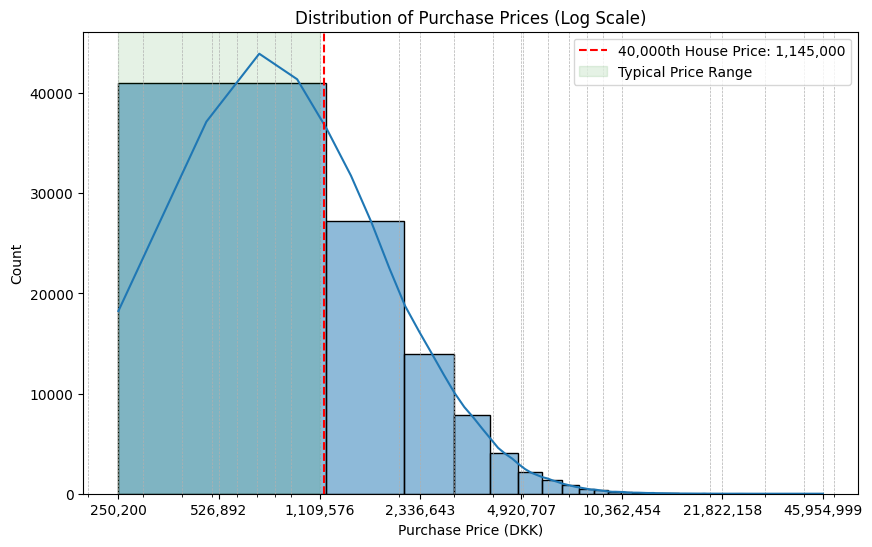

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(final_df['purchase_price'], bins=50, kde=True)
plt.title("Distribution of Purchase Prices (Log Scale)")
plt.xlabel("Purchase Price (DKK)")
plt.ylabel("Count")
plt.xscale('log')

# Log scale grid
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

# Set custom log ticks
min_price = final_df['purchase_price'].min()
max_price = final_df['purchase_price'].max()
ticks = np.logspace(np.log10(min_price), np.log10(max_price), num=8)
plt.xticks(ticks, [f'{int(x):,}' for x in ticks])

# Highlight key house
price_at_40k = 1_145_000  
plt.axvline(x=price_at_40k, color='red', linestyle='--', label=f'40,000th House Price: {price_at_40k:,}')

# Optional: Highlight typical range
normal_min = 250_200
normal_max = 1_109_576
plt.axvspan(normal_min, normal_max, color='green', alpha=0.1, label='Typical Price Range')

plt.legend()
plt.show()


### Description:
This plot shows the distribution of home purchase prices using a standard (linear) x-axis.

- The red dashed line marks the 40,000th house, which represents the 40th percentile of the dataset. 
- This means 40% of the houses were sold at or below approximately DKK 1,145,000.
- Most homes are clustered in the lower to middle price ranges, while high-priced properties appear as outliers

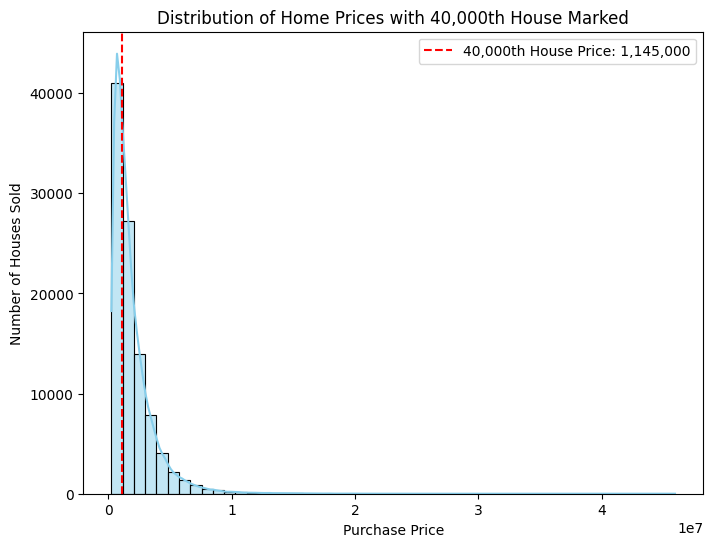

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

price_at_40k = final_df['purchase_price'].sort_values().iloc[39999]

plt.figure(figsize=(8, 6)) 
sns.histplot(final_df['purchase_price'], bins=50, kde=True, color="skyblue", edgecolor="black") 
plt.axvline(x=price_at_40k, color='red', linestyle='--', label=f'40,000th House Price: {price_at_40k:,}') 

plt.xlabel("Purchase Price") 
plt.ylabel("Number of Houses Sold") 
plt.title("Distribution of Home Prices with 40,000th House Marked") 
plt.legend() 

plt.show()


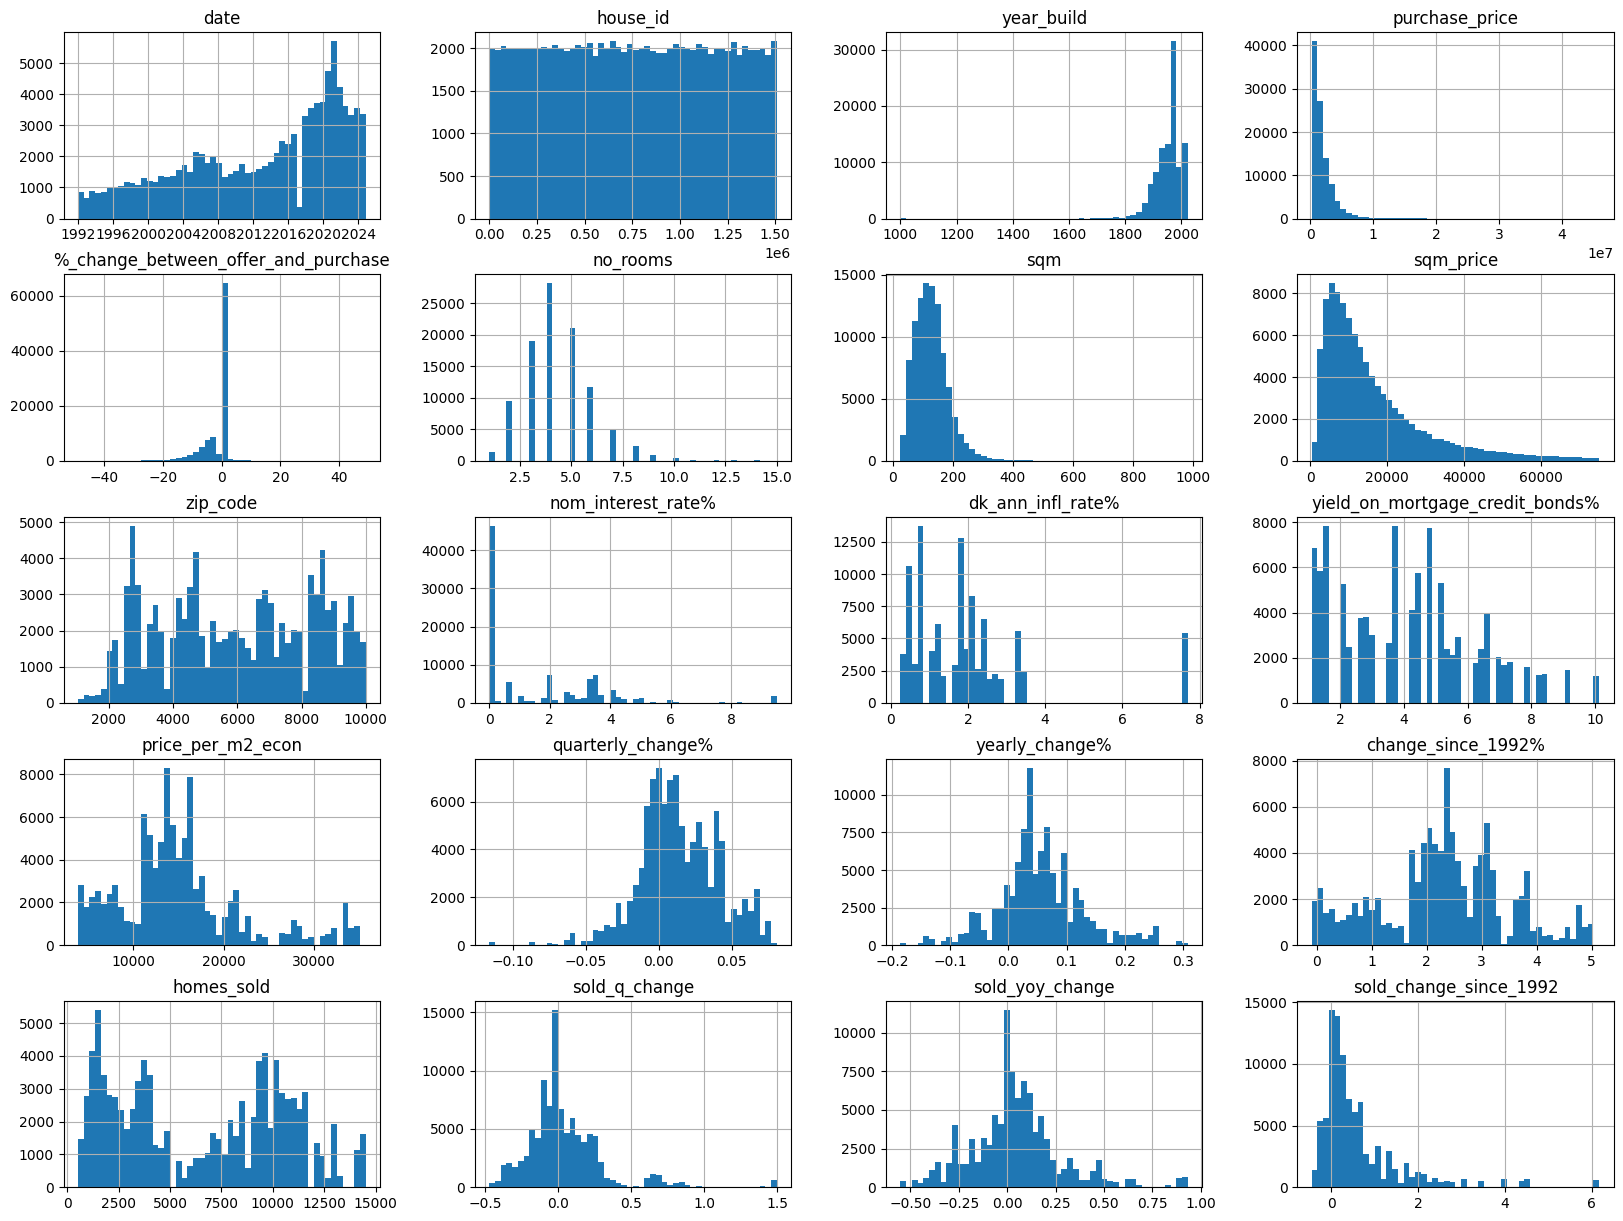

In [14]:
final_df.hist(bins=50, figsize=(20, 15))
plt.show()

## Assessing Normality
1. Key Observations:
- Right-Skewed Distribution: The histogram clearly shows that house prices are heavily concentrated in the lower range, with most sales occurring 
below 1,109,576. The curve peaks around the lower price range and gradually tapers off as prices increase.
- Long Tail to the Right: The distribution has a long right tail, indicating that while most house prices are clustered at the lower end.
There are fewer but extremely high-priced houses in the data, which significantly extend the range of prices.
2. Does the Data Follow a Normal Distribution?
- Not Normal: From the visualizations, it is evident that the data does not follow a normal distribution. 
In a normal distribution, we would expect a bell-shaped curve, with most of the data clustered around the center.
- Right-Skewed: Instead of a bell curve, we observe a right-skewed distribution. 
This means that the majority of house prices are located in the lower ranges, with a long tail of high-value houses that skew the data to the right. 

3. Conclusion:
Based on the visualizations, it is clear that the purchase_price distribution is non-normal and right-skewed. 

### Use Log Transformation?
# Fix Skewness:
-The original distribution of house prices is right-skewed (many low values, few extremely high ones). Log transformation:
- Compresses the large values.
- Spreads out the small ones
- Makes the distribution more symmetric.
# Improve Visualization:
- Raw price plots are dominated by a few expensive houses.
- Log prices show patterns, clusters, and outliers more clearly.

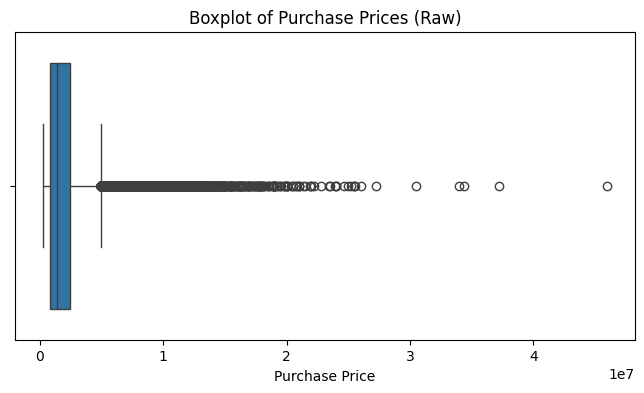

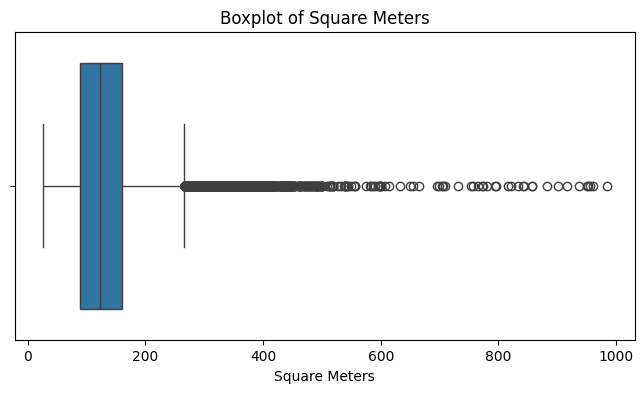

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.boxplot(x=final_df['purchase_price'])
plt.title("Boxplot of Purchase Prices (Raw)")
plt.xlabel("Purchase Price")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=final_df['sqm'])
plt.title("Boxplot of Square Meters")
plt.xlabel("Square Meters")
plt.show()


In [16]:
# Calculate IQR
q1 = final_df['purchase_price'].quantile(0.25)
q3 = final_df['purchase_price'].quantile(0.75)
iqr = q3 - q1

# Calculate upper limit for non-outliers (whisker)
upper_whisker = q3 + 1.5 * iqr
print(f"Upper whisker: {upper_whisker:,.0f}")


Upper whisker: 4,925,000


### Key Observations:
Most home prices are concentrated below 4,925,000 DKK

This suggests that the majority of transactions occur in a relatively moderate price range.

It aligns with the right-skewed distribution where the bulk of data is on the lower end.

A few extreme outliers exceed this threshold, reaching up to 45,955,000 DKK

These high-priced properties are rare but significantly influence the range and shape of the distribution.

Such outliers can distort statistical analysis and should be carefully handled or transformed (log scale) in modeling.

### Plot (Log Scale)

### Log-Transformed Purchase Price Distribution

- Reduced skewness significantly.

- Outliers identified at around 13.1 million DKK (more realistic based on data range).

- Better visual clarity and statistical symmetry.



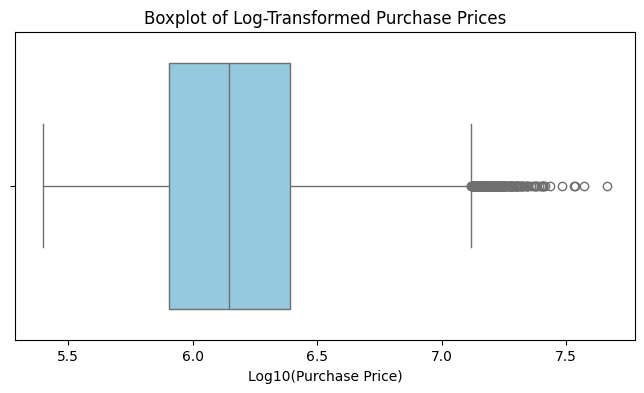

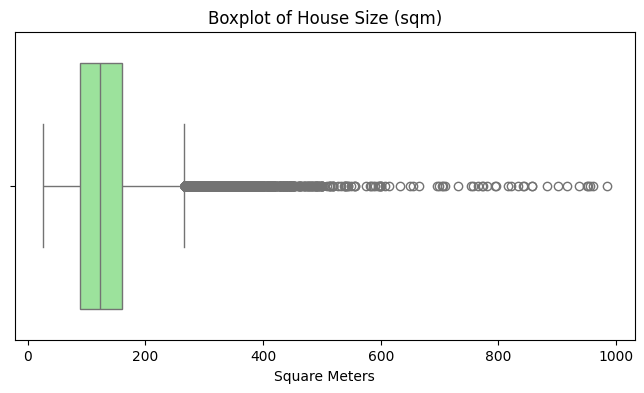

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
final_df['log_purchase_price'] = np.log10(final_df['purchase_price'])

plt.figure(figsize=(8, 4))
sns.boxplot(x=final_df['log_purchase_price'], color='skyblue')
plt.title("Boxplot of Log-Transformed Purchase Prices")
plt.xlabel("Log10(Purchase Price)")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=final_df['sqm'], color='lightgreen')
plt.title("Boxplot of House Size (sqm)")
plt.xlabel("Square Meters")
plt.show()



In [18]:
log_prices = np.log10(final_df['purchase_price']) 

q1 = log_prices.quantile(0.25)
q3 = log_prices.quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr
upper_whisker_exp = 10 ** upper_whisker  

print(f"Upper whisker on log scale: {upper_whisker:.2f}")
print(f"Upper whisker in original scale: {upper_whisker_exp:,.0f}")



Upper whisker on log scale: 7.12
Upper whisker in original scale: 13,130,469


### Log and Original Scale for sqm (House Size)
- Upper Whisker in Log and Original Scale for sqm
- Upper Whisker (log scale): 2.59
- This is the threshold value in log10 scale used to identify the boundary above which data is considered an outlier.
- In plain terms, if log10(sqm) > 2.59, it's likely an outlier.
- Upper Whisker (original scale): 386
- This is the same threshold in the original square meter scale.
- Any house with more than 386 square meters is considered an outlier based on the IQR method.


In [19]:
import numpy as np
log_sqm = np.log10(final_df['sqm'])

q1 = log_sqm.quantile(0.25)
q3 = log_sqm.quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr

upper_whisker_exp = 10 ** upper_whisker

print(f"Upper whisker on log10 scale for sqm: {upper_whisker:.2f}")
print(f"Upper whisker in original scale for sqm: {upper_whisker_exp:,.0f}")


Upper whisker on log10 scale for sqm: 2.59
Upper whisker in original scale for sqm: 386


### Outlier Detection in purchase_price
## Why We Use Log Scale for Outlier Removal
- The purchase_price distribution is right-skewed, with most homes priced below ~1.1 million, and a long tail extending to over 45 million DKK.
- Using the IQR method on the raw scale flags many high-priced but valid homes as outliers (e.g., anything above 4,925,000).
- This can bias the dataset by removing genuine high-value observations.
- Log Transformation Improves Accuracy
- Applying the IQR method on the log-transformed prices gives a more balanced outlier threshold of 13,130,469.
- This better reflects the dataâ€™s spread and helps preserve high-end properties that are valid but rare.

### Outlier Summary (Log Scale)
- Total outliers in purchase_price: 229
- Low outliers: 0
-High outliers: 229
-Remaining rows after outlier removal: 99,771 (out of 100,000)

In [20]:
final_df['log_price'] = np.log10(final_df['purchase_price'])


Q1_log = final_df['log_price'].quantile(0.25)
Q3_log = final_df['log_price'].quantile(0.75)
IQR_log = Q3_log - Q1_log

lower_log = Q1_log - 1.5 * IQR_log
upper_log = Q3_log + 1.5 * IQR_log

print(f"Lower whisker on log scale: {lower_log:.2f}")
print(f"Upper whisker on log scale: {upper_log:.2f}")

upper_original = 10 ** upper_log
print(f"Upper whisker in original scale: {upper_original:,.0f}")

outliers_log = final_df[(final_df['log_price'] < lower_log) | (final_df['log_price'] > upper_log)]
low_outliers_log = final_df[final_df['log_price'] < lower_log]
high_outliers_log = final_df[final_df['log_price'] > upper_log]


print(f"\nTotal outliers in `purchase_price` (log scale): {len(outliers_log)}")
print(f"Low outliers: {len(low_outliers_log)}")
print(f"High outliers: {len(high_outliers_log)}")

homes_cleaned_log = final_df[
    (final_df['log_price'] >= lower_log) &
    (final_df['log_price'] <= upper_log)
].copy()

print(f"\nTotal rows after outlier removal (log scale): {len(homes_cleaned_log)}")

print("\nSummary statistics after log-based outlier removal:")
print(homes_cleaned_log['purchase_price'].describe().apply(lambda x: f"{x:,.0f}"))


Lower whisker on log scale: 5.17
Upper whisker on log scale: 7.12
Upper whisker in original scale: 13,130,469

Total outliers in `purchase_price` (log scale): 229
Low outliers: 0
High outliers: 229

Total rows after outlier removal (log scale): 99771

Summary statistics after log-based outlier removal:
count        99,771
mean      1,891,397
std       1,613,387
min         250,200
25%         800,000
50%       1,400,000
75%       2,440,000
max      13,123,201
Name: purchase_price, dtype: object


### Handling Large Homes (>386 sqm)

## Context:
- Using the IQR method, homes with a living area greater than **386 sqm** were flagged as potential outliers.

## Remove or keep
- Although these values are statistically outliers, they are **not errors or anomalies**. Instead, they represent **larger family homes**, villas, or luxury properties that are naturally part of the real estate market.

## Decision: Keep Them

We chose to **retain homes above 386 sqm** in the dataset for the following reasons:

- **They are valid entries**: Large homes exist, especially in certain zip codes or rural regions.
- **They represent an important market segment**: Excluding them would ignore high-end property trends.
- **Useful for model training**: Supervised learning models benefit from seeing the full range of values to learn accurate pricing patterns.
- **Better approach than removal**: Instead of deleting these observations, we can apply transformations (log-scaling) or include a binary flag to indicate large properties.


* Use `log(sqm)` to reduce skewness.
* Add a feature like `is_large_home = sqm > 386`.


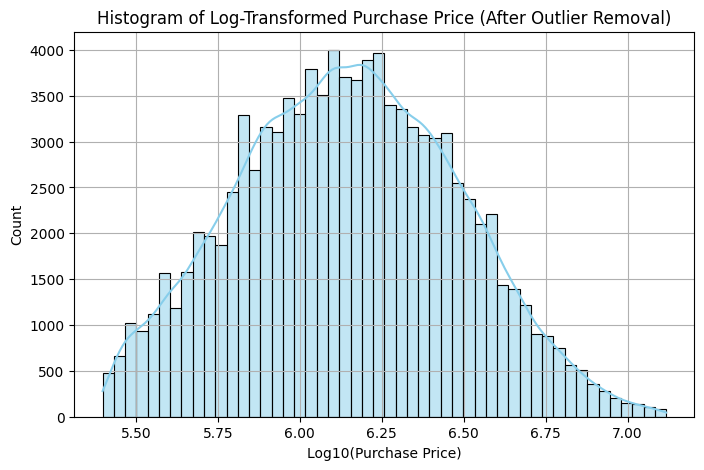

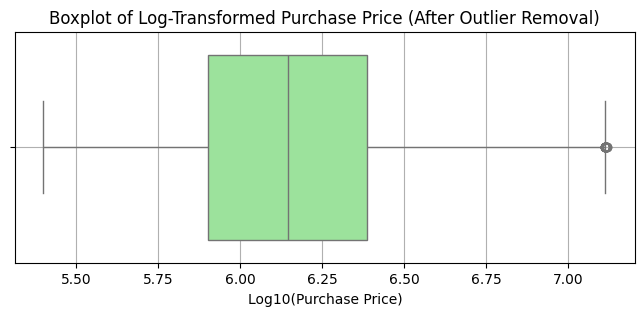

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of log-transformed prices
plt.figure(figsize=(8, 5))
sns.histplot(homes_cleaned_log['log_price'], bins=50, kde=True, color='skyblue')
plt.title("Histogram of Log-Transformed Purchase Price (After Outlier Removal)")
plt.xlabel("Log10(Purchase Price)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Boxplot of log-transformed prices
plt.figure(figsize=(8, 3))
sns.boxplot(x=homes_cleaned_log['log_price'], color='lightgreen')
plt.title("Boxplot of Log-Transformed Purchase Price (After Outlier Removal)")
plt.xlabel("Log10(Purchase Price)")
plt.grid(True)
plt.show()


### Interpretation

The Anderson-Darling test compares the test statistic with the critical values at various significance levels.
If the test statistic > critical value, the data does not follow a normal distribution at that significance level.

1. Test Statistic: 74.1770

2. Critical Values:

* At 15.0% significance: 0.5760

* At 10.0% significance: 0.6560

* At 5.0% significance: 0.7870

* At 2.5% significance: 0.9180

* At 1.0% significance: 1.0920    

# What is this number?
* The Anderson-Darling statistic measures how far your sample data deviates from a normal distribution.

* Higher values mean greater deviation from normality.

* If the test statistic exceeds the critical value at a certain significance level, you reject the null hypothesis that the data is normally distributed.

# In our case:

- Test Statistic = 74.1770

- Even the strictest critical value (at 1%) is only 1.0920, which is far below 74.1770.

# Conclusion
While the Anderson-Darling test suggests that our log-transformed purchase_price data is statistically non-normal, this is common with large samples. In practice, the log transformation has improved the dataâ€™s symmetry and reduced the undue influence of extreme values, making it more suitable for modeling.




In [22]:
from scipy.stats import anderson

result = anderson(homes_cleaned_log['log_price'])

print(f"Test Statistic: {result.statistic:.4f}")
for sl, cv in zip(result.significance_level, result.critical_values):
    print(f"Significance Level: {sl:.1f}%, Critical Value: {cv:.4f}")


Test Statistic: 74.1770
Significance Level: 15.0%, Critical Value: 0.5760
Significance Level: 10.0%, Critical Value: 0.6560
Significance Level: 5.0%, Critical Value: 0.7870
Significance Level: 2.5%, Critical Value: 0.9180
Significance Level: 1.0%, Critical Value: 1.0920


In [23]:
log_prices = np.log10(homes_cleaned_log['purchase_price'])

q1 = log_prices.quantile(0.25)
q3 = log_prices.quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr

upper_whisker_exp = 10 ** upper_whisker

print(f"Upper whisker on log10 scale: {upper_whisker:.2f}")
print(f"Upper whisker in original scale: {upper_whisker_exp:,.0f}")


Upper whisker on log10 scale: 7.11
Upper whisker in original scale: 12,996,894


### Decision: Keep or Remove High-End Outliers?

Using the log10-based IQR method, we found 27 homes priced just above the outlier threshold of 13.13 million DKK.

**Log10 Threshold**: 7.11  
**Examples of borderline outliers:**
- 13,123,201 DKK (log10 = 7.118)
- 13,100,000 DKK (log10 = 7.117)

These homes are only marginally above the calculated threshold and still reflect realistic values for large or luxury properties.

####  Final Decision:
We **chose to keep** these 27 borderline outliers to preserve potentially informative high-end housing data in our model training.


In [24]:
import numpy as np

homes_cleaned_log['log10_price'] = np.log10(homes_cleaned_log['purchase_price'])

upper_whisker_log10 = 7.11

outliers_log = homes_cleaned_log[homes_cleaned_log['log10_price'] > upper_whisker_log10]

print(f"Number of outliers (log10 > 7.11): {len(outliers_log)}")
print("\nExample outliers:")
print(outliers_log[['purchase_price', 'log10_price']].sort_values(by='purchase_price', ascending=False).head())


Number of outliers (log10 > 7.11): 27

Example outliers:
       purchase_price  log10_price
67719        13123201     7.118040
78715        13110500     7.117619
12538        13100000     7.117271
70904        13100000     7.117271
66139        13100000     7.117271


### Conclusion
Based on this comparison, log transformation offers a more balanced representation of house prices and will be used in further analysis and modeling to improve model robustness and performance.

### Log Transformation Will Be Used for Modeling
-Given the right-skewed distribution of purchase_price, using the raw price values can lead to biased model training.
- where the model is overly influenced by extreme values.

## Log Transformation Advantage:

- Reduces the impact of extreme outliers.

- Makes the distribution more symmetric.

- Improves performance of models that assume normality (e.g., linear regression).


In [25]:
homes_cleaned_log.columns

Index(['date', 'quarter', 'house_id', 'house_type', 'sales_type', 'year_build',
       'purchase_price', '%_change_between_offer_and_purchase', 'no_rooms',
       'sqm', 'sqm_price', 'address', 'zip_code', 'area', 'region',
       'nom_interest_rate%', 'dk_ann_infl_rate%',
       'yield_on_mortgage_credit_bonds%', 'price_per_m2_econ',
       'quarterly_change%', 'yearly_change%', 'change_since_1992%',
       'homes_sold', 'sold_q_change', 'sold_yoy_change',
       'sold_change_since_1992', 'log_purchase_price', 'log_price',
       'log10_price'],
      dtype='object')

### Next Step:
- Convert Data Types
- Feature Engineering
- Apply a log transformation to purchase_price before training the model, ensuring a more balanced and accurate learning process.

### Why We Convert Data Types

Before feature engineering, we convert data types to:

* **Ensure Compatibility**: Models need numeric input â€” categorical and date features must be converted.
* **Enable Encoding**: Categorical columns like `region` or `house_type` need to be encoded.
* **Extract Features**: Date columns must be `datetime` type to extract year and month.
* **Clean Data**: Fix incorrect types (percentages stored as text) for accurate calculations.

This step improves model performance and prevents errors during training.


In [26]:
homes_cleaned_log.dtypes

date                                   datetime64[ns]
quarter                                        object
house_id                                        int64
house_type                                     object
sales_type                                     object
year_build                                      int64
purchase_price                                  int64
%_change_between_offer_and_purchase           float64
no_rooms                                        int64
sqm                                           float64
sqm_price                                     float64
address                                        object
zip_code                                        int64
area                                           object
region                                         object
nom_interest_rate%                            float64
dk_ann_infl_rate%                             float64
yield_on_mortgage_credit_bonds%               float64
price_per_m2_econ           

### Dropp and RecreatLog Columns

To ensure data clarity and avoid redundancy, we dropped previously created log-based columns (`log_purchase_price`, `log_price`, `log10_price`) 
and created a **single consistent log-transformed feature** named `log_price` using `log10`.

Using one clearly named column:

* Simplifies analysis and modeling
*  Prevents confusion from having multiple versions of the same transformation
*  Ensures consistent use of `log10` scale across visualizations and models

This cleaned setup makes it easier to track transformations and interpret model results.


In [27]:
homes_cleaned_log = homes_cleaned_log.drop(
    columns=['log_purchase_price', 'log_price', 'log10_price'], 
    errors='ignore'
)

In [28]:
homes_cleaned_log['log_price'] = np.log10(homes_cleaned_log['purchase_price'])


In [29]:
homes_cleaned_log.dtypes

date                                   datetime64[ns]
quarter                                        object
house_id                                        int64
house_type                                     object
sales_type                                     object
year_build                                      int64
purchase_price                                  int64
%_change_between_offer_and_purchase           float64
no_rooms                                        int64
sqm                                           float64
sqm_price                                     float64
address                                        object
zip_code                                        int64
area                                           object
region                                         object
nom_interest_rate%                            float64
dk_ann_infl_rate%                             float64
yield_on_mortgage_credit_bonds%               float64
price_per_m2_econ           

### Feature Engineering

# For Analysis 


1. Instead of just price, using **price per room**
- It gives a clear picture of value per room in a house.
- Helps spot extreme values or inconsistencies (very high price per room might indicate a luxury home or bad data).
- Makes it easier to compare homes of different sizes in a normalized way.
  
** we do not use it in training:**
- price_per_room = purchase_price / no_rooms
- So if you include price_per_room and use purchase_price as the target, we will be feeding the model a shortcut to the answer.
2. Room density â€“ how many square meters per room. Why This Feature is useful:
- Room density (sqm per room) gives a normalized view of space.
- It helps you see quality of design, space per person, and comfort level.
- It is great for data understanding, clustering, and visualizations.
- It reduces noise when comparing houses with different layouts.
  
  ** we do not use it in training:**
- sqm is highly correlated with purchase_price. So room_density still leaks pricing power
-It acts like a shortcut to the answer, so it hides the target (The thing we want the model to predict) inside a feature.
  
# Model Training
Feature engineering helps make your data **more useful** for the model. Instead of giving raw numbers or text, we create **new features** that help the model understand patterns better.
Feature engineering:
* A model might not understand a full date like "2022-06-01", but it can learn from the **year** or **month**.
* Makes patterns **clearer** for the model
* Helps the model **learn faster**
* Often gives **better results*

We made new features from the data to help the model learn better:

1. The **date** column was changed to real date format, because the model can't learn from full dates as plain text (strings).
2. From that date, we added:

   * The **year**,
   * The **month**,
   * And the **quarter** the house was sold.
3. We added **house age** â€“ how old the house is. older vs newer homes can affect prise

4. **Room density** â€“ how many square meters per room. Why This Feature is useful:
This gives insight into how large or small the rooms are, on average, which is very useful for predicting price and understanding property quality.
How It Helps:
- Quality of space as Larger rooms often suggest a more spacious, higher-end home. Smaller room density might mean tight spaces or poor design.
- Normalize for size: Two homes with the same number of rooms might be very different in square meters. This feature captures that.
- Better modeling: It reduces the risk of misleading the model with raw sqm and no_rooms separately instead, it shows the relationship between them.
5. **Log price** â€“ a better version of price that makes model training easier. Why it is useful:
- Reduces skew: Housing prices are usually right skewed. Log transformation flattens the curve, making it more symmetrical and normal like.
- Improves model performance: Many machine learning models work better when the target variable like price has a normal distribution.
- Handles large ranges: It reduces the effect of very large prices and makes all values closer together, which helps prevent the model from being biased toward high-value homes.


These new features give the model **clearer and more useful info**, so it can make **better predictions**

In [30]:
homes_cleaned_log = homes_cleaned_log.copy()

homes_cleaned_log['date'] = pd.to_datetime(homes_cleaned_log['date'])

homes_cleaned_log['year'] = homes_cleaned_log['date'].dt.year
homes_cleaned_log['month'] = homes_cleaned_log['date'].dt.month
homes_cleaned_log['quarter_from_date'] = homes_cleaned_log['date'].dt.quarter  

homes_cleaned_log['house_age'] = homes_cleaned_log['year'] - homes_cleaned_log['year_build']

homes_cleaned_log['price_per_room'] = homes_cleaned_log['purchase_price'] / homes_cleaned_log['no_rooms']

homes_cleaned_log['room_density'] = homes_cleaned_log['sqm'] / homes_cleaned_log['no_rooms']

homes_cleaned_log = homes_cleaned_log.drop(columns=[
    col for col in ['log_purchase_price', 'log_price', 'log10_price'] if col in homes_cleaned_log.columns
])

homes_cleaned_log['log_price'] = np.log10(homes_cleaned_log['purchase_price'])

homes_cleaned_log.head()


date quarter  house_id house_type    sales_type  year_build  \
0 2024-10-24  2024Q4        16      Villa  regular_sale        1997   
1 2024-10-24  2024Q4        13  Apartment  regular_sale        1885   
2 2024-10-23  2024Q4        60      Villa  regular_sale        1949   
3 2024-10-23  2024Q4        29      Villa  regular_sale        2001   
4 2024-10-22  2024Q4        92  Apartment  regular_sale        1965   

   purchase_price  %_change_between_offer_and_purchase  no_rooms    sqm  ...  \
0         6500000                                 -3.0         5  142.0  ...   
1         3400000                                  0.0         2   46.0  ...   
2         4550000                                 -4.0         4  112.0  ...   
3         1630000                                -12.0         4  186.0  ...   
4         1975000                                -10.0         3   82.0  ...   

   sold_q_change sold_yoy_change  sold_change_since_1992  year month  \
0         -0.082           0.092                   0.157  2024    10   
1          0.004          -0.030                   0.539  2024    10   
2         -0.082           0.092                   0.157  2024    10   
3         -0.082           0.092                   0.157  2024    10   
4          0.004          -0.030                   0.539  2024    10   

   quarter_from_date  house_age  price_per_room  room_density  log_price  
0                  4         27    1.300000e+06     28.400000   6.812913  
1                  4        139    1.700000e+06     23.000000   6.531479  
2                  4         75    1.137500e+06     28.000000   6.658011  
3                  4         23    4.075000e+05     46.500000   6.212188  
4                  4         59    6.583333e+05     27.333333   6.295567  

[5 rows x 33 columns]

In [31]:
homes_cleaned_log.columns
homes_cleaned_log.dtypes

date                                   datetime64[ns]
quarter                                        object
house_id                                        int64
house_type                                     object
sales_type                                     object
year_build                                      int64
purchase_price                                  int64
%_change_between_offer_and_purchase           float64
no_rooms                                        int64
sqm                                           float64
sqm_price                                     float64
address                                        object
zip_code                                        int64
area                                           object
region                                         object
nom_interest_rate%                            float64
dk_ann_infl_rate%                             float64
yield_on_mortgage_credit_bonds%               float64
price_per_m2_econ           

### Drop columns
- Address is too detailed and unique per row so it will not help generalize patterns.
- House_id is just an identifier, so it has no predictive value.

In [32]:
homes_cleaned_log = homes_cleaned_log.drop(columns=['address', 'house_id'])

In [33]:
homes_cleaned_log.dtypes

date                                   datetime64[ns]
quarter                                        object
house_type                                     object
sales_type                                     object
year_build                                      int64
purchase_price                                  int64
%_change_between_offer_and_purchase           float64
no_rooms                                        int64
sqm                                           float64
sqm_price                                     float64
zip_code                                        int64
area                                           object
region                                         object
nom_interest_rate%                            float64
dk_ann_infl_rate%                             float64
yield_on_mortgage_credit_bonds%               float64
price_per_m2_econ                               int64
quarterly_change%                             float64
yearly_change%              

### Columns to Encode
object (string) types must be encoded:

In [34]:
homes_encoded = pd.get_dummies(homes_cleaned_log, 
                               columns=['quarter', 'house_type', 'sales_type', 'area', 'region'],
                               drop_first=True) 

In [35]:
homes_encoded.dtypes

date                                   datetime64[ns]
year_build                                      int64
purchase_price                                  int64
%_change_between_offer_and_purchase           float64
no_rooms                                        int64
                                            ...      
area_Other islands                               bool
area_South jutland                               bool
region_Fyn & islands                             bool
region_Jutland                                   bool
region_Zealand                                   bool
Length: 172, dtype: object

### Why We Dropped Leaky Columns

In machine learning, **leaky features** are columns that directly include or reveal the **target variable** (what we want the model to predict). 
Using them in training can make the model learn information it would not have in real-world prediction and leading 
to **overfitting** and unrealistically high accuracy.

# We dropped the following columns:

* **`purchase_price`**: This is the actual target (what we're predicting).
* **`log_price`**: A transformed version of the target.
* **`sqm_price`**, **`price_per_room`**, **`room_density`**: These are derived using the target (`purchase_price`), so they "leak" its value.
* **`date`**: We've already extracted useful features like `year`, `month`, and `quarter_from_date`, so we donâ€™t need the full raw date.

Dropping these ensures our model is trained on fair, realistic features â€” making it **more robust and generalizable**.



In [36]:
leaky_columns = [
    'purchase_price',
    'log_price',
    'sqm_price',
    'price_per_room',
    'room_density',
    'date' 
]

homes_encoded = homes_encoded.drop(columns=[col for col in leaky_columns if col in homes_encoded.columns])



### Supervised Learning

Supervised learning is a type of machine learning where the model is trained on a dataset that includes both:

- **`X` (Features):** The input variables used to make predictions.
- **`y` (Labels):** The known output or target variable that we want to predict.

In our case:

- **`X` includes:** Bedrooms, Size (sqft), and Location Score
- **`y` is:** House Price

In [37]:
X = homes_encoded
y = homes_cleaned_log['log_price']


In [38]:
y = homes_cleaned_log['log_price']  

X = homes_encoded  

print(y.name)


log_price


### Modeling Approach: Bagging, Stacking & Modular Design

To build a **robust and reliable model**, project followed a structured approach using ensemble methods and clean design principles:

### 1. **Bagging** (Bootstrap Aggregating)

**What it is:**
Bagging trains **multiple models independently** (on random subsets of data) and **averages their predictions**.
This reduces overfitting and increases stability.

**Used in:** Random Forest
Each tree in a Random Forest is trained on different data and features â€” this is bagging in action.

**Why it's good:**

* Handles noisy data well
* Reduces model variance
* Improves prediction accuracy

## 2. What is Boosting?

**Boosting** is an **ensemble learning** technique that builds a strong model by **combining many weak learners** (typically shallow decision trees) in **sequence**.

### How It Works:

1. Start with a simple model (a weak learner).
2. Measure where it performs poorly (errors).
3. Build a new model that focuses on **correcting those errors**.
4. Repeat this process for a number of iterations.
5. Combine all models' predictions in a **weighted sum** to get the final prediction.

### Why Boosting Is Powerful:

*  **Reduces bias** â€” by focusing on mistakes made in previous steps.
*  **Improves accuracy** â€” often outperforms bagging models (like Random Forest) on structured/tabular data.
*  Each model is dependent on the previous, creating a **strong chain of learning**.

### Common Boosting Algorithms:

## Algorithm:
- **AdaBoost**          
- **Gradient Boosting** 
- **XGBoost**           
- **LightGBM**          
- **CatBoost**
  
### Use Boosting When:

* You need **high predictive accuracy**.
* Your bagging model (like Random Forest) still has **high bias**.
* You can tolerate **slower training times** for better performance.

### 3. **Stacking** (Stacked Generalization)

**What it is:**
Stacking **combines different types of models** (Random Forest + Gradient Boosting + Linear Regression) and uses a **meta-model** to learn how to best combine them.

This is useful when:

* Different models capture different patterns
* We want to **blend strengths** of multiple algorithms

**Why it's good:**

* Often improves performance over a single model
* Allows us to use multiple learning strategies together





### Summary: Why This Approach Is Strong
1. **Bagging**
- Purpose: Reduce overfitting, improve stability.
-  Benefit: Lower variance, better generalization.
2. **Stacking**
- Purpose: Combine strengths of models.
- Benefit: Higher accuracy, capture complex patterns.
 


This combination creates a strong foundation for both **supervised learning** (like predicting house prices) and future **unsupervised exploration**.


We use `train_test_split()` to **split the data** into:

* `X_train`, `y_train`: used to **train the model**
* `X_test`, `y_test`: used to **test how well the model performs**

We keep **20% of the data for testing** (`test_size=0.2`), and `random_state=42` ensures the split is the same every time (for reproducibility).

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Random Forest Model Evaluation

We trained a **Random Forest model** to predict house prices. Since we used `log_price` as the target during training (with `np.log10()`), 
we needed to:

* Use `np.power(10)` to **reverse the log10 transformation** on both predictions and actual values.
* Then, we evaluated the model using:

  * **RMSE (Root Mean Squared Error)** â€“ shows how far predictions are from actual prices. Lower is better.
  * **RÂ² Score** â€“ shows how well the model explains the variation in house prices. Closer to 1 is better.
  * Random Forest:
  - RMSE: 1,040,160.90
  - RÂ² Score: 0.5913


### Why Reverse the Log?

Because RMSE and RÂ² make **more sense in real price units** (like euros or dollars), not on log-transformed values.

By reversing the log transformation on both the predictions and the true values, we evaluate the modelâ€™s **real-world performance** 
answering: *How close are we to predicting actual house prices.


### **Bagging**â€”specifically by using the **Random Forest** model.


### What Is Bagging?

**Bagging** (Bootstrap Aggregating) is an ensemble technique that:

* Trains **multiple models** (typically decision trees) on **random subsets** of the data.
* Averages their predictions to improve accuracy and reduce overfitting.

### Why Random Forest = Bagging

* **Random Forest** is a classic **Bagging algorithm**.
* It builds **many decision trees** on different random samples of your dataset.
* It also selects a **random subset of features** for each tree (extra randomness = better generalization).
* Then it **averages**


### Why Regression?
We are predicting a continuous numeric value (price), not categories. This makes it a regression problem, not classification. 
We use RandomForestRegressor because our goal is to estimate actual prices, not assign class labels.

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and reverse log10
rf_log_preds = rf_model.predict(X_test)
rf_price_preds = np.power(10, rf_log_preds)  
actual_prices = np.power(10, y_test)         

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(actual_prices, rf_price_preds))
rf_r2 = r2_score(actual_prices, rf_price_preds)

print("Random Forest:")
print(f"RMSE: {rf_rmse:.2f}")
print(f"RÂ² Score: {rf_r2:.4f}")


Random Forest:
RMSE: 1040160.90
RÂ² Score: 0.5913


### Results:

Random Forest:
- RMSE: 1,040,160.90
- RÂ² Score: 0.5913
### What this means:
#### **1. RÂ² Score: 0.5913**
* The model explains **59.13% of the variation** in house prices.
* In other words:

  > The model is capturing more than **half** of what influences house prices,
  > but **around 41%** of the price variation is still unexplained (could be due to missing features, randomness, or noise).
* This is a **decent result** for real-world house price prediction, where full accuracy is rarely achievable.


#### **2. RMSE: 1,040,160.90**

* This is the **average error** in **price units**
* Predictions are **off by about 1,040,000 units**, on average.
* Interpretation:

  > If a home actually sells for 6 million, the model might predict anywhere around 5 million to 7 million.

This metric is **sensitive to large errors**, which makes it useful for high-stakes predictions (like prices).

-


How to read it:

Each point represents one house.
The red dashed line is the ideal scenario: predicted price = actual price.

The closer the points are to the red line, the better the model is performing.

A wide scatter around the line indicates prediction errors.

This visualization is helpful to spot:

Systematic over or under prediction

Whether the model struggles more with cheap or expensive homes

General prediction spread (variance)

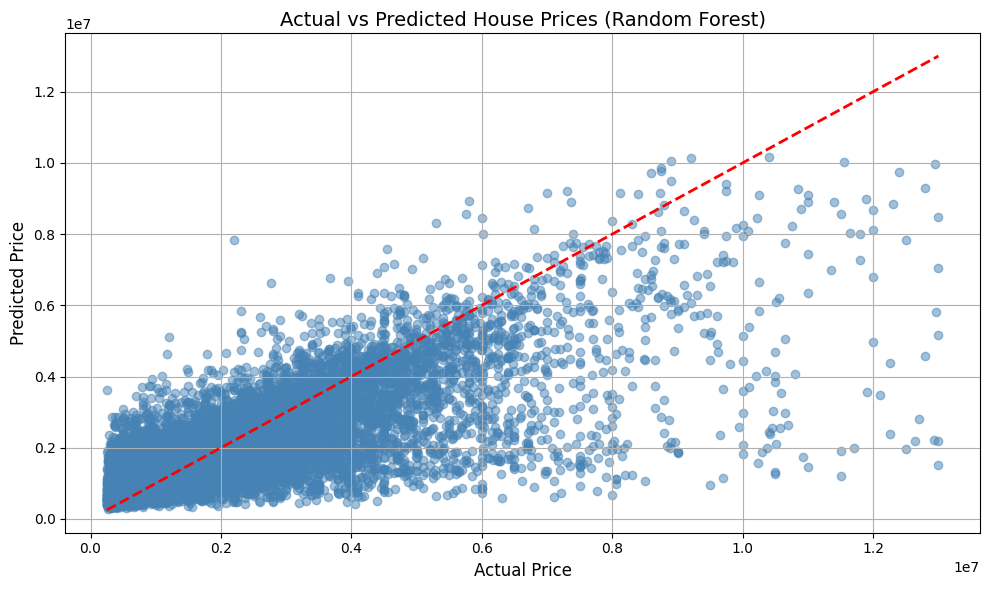

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, rf_price_preds, alpha=0.5, color='steelblue')
plt.plot([actual_prices.min(), actual_prices.max()],
         [actual_prices.min(), actual_prices.max()],
         'r--', lw=2)

plt.title('Actual vs Predicted House Prices (Random Forest)', fontsize=14)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


##  Hyperparameter Tuning with RandomizedSearchCV

**Hyperparameter tuning** is the process of finding the best settings (parameters) for a machine learning model to improve performance.

A Random Forest model has many hyperparameters, such as:
- `n_estimators`: how many trees in the forest
- `max_depth`: how deep each tree can grow
- `min_samples_split`: minimum samples needed to split a node
- `max_features`: how many features to consider when splitting

We use **`RandomizedSearchCV`** to:
- Try different combinations of these parameters
- Evaluate them using **cross-validation**
- Automatically select the **best model**

This helps improve accuracy without overfitting and makes our model more robust.

We tuned our Random Forest to predict housing prices more accurately by searching for better hyperparameters.


### `RandomizedSearchCV` **finds the best combination** of hyperparameters from the ranges specify.

### How it works:

* It **randomly samples combinations** of hyperparameters from `param_grid`.
* For each combination, it:

  * Trains a model
  * Evaluates it using **cross-validation**
* After trying `n_iter` combinations:

  * Selects the **best performing combination**
  * Saves it as `rf_random.best_estimator_`

### What we get:

* The **best-tuned model**: `best_rf`
* The **best hyperparameters**: `rf_random.best_params_`
* **Improved accuracy**: often better RMSE / RÂ²


### Model Tuning (RandomizedSearchCV)

We used **RandomizedSearchCV** to improve our Random Forest model by finding the best combination of hyperparameters.

Instead of using defaults, tuning tests many settings like:

* `n_estimators` (number of trees)
* `max_depth` (tree depth)
* `min_samples_split` (min samples to split)

**Why itâ€™s useful:**

* Improves model performance
* Reduces error (lower RMSE)
* Avoids overfitting or underfitting
* Finds the best parameters faster than Grid Search

This helps the model make **more accurate predictions** on new data.



### Randomized Hyperparameter Tuning for Random Forest
## Performance After Tuning:

After applying the best parameters to our model and evaluating on the test set:
- RMSE: 1,039,500.81
- RÂ² Score: 0.5918

This tuning step helped slightly improve model performance and ensured that our final model is better optimized for this prediction task.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the base model
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,             # Number of parameter combinations to try
    cv=5,                  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,             # Use all CPU cores
    random_state=42,
    scoring='neg_root_mean_squared_error'  # Evaluation metric
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict and reverse log
rf_log_preds = best_rf.predict(X_test)
rf_price_preds = np.power(10, rf_log_preds)  # reverse log10
actual_prices = np.power(10, y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(actual_prices, rf_price_preds))
r2 = r2_score(actual_prices, rf_price_preds)

print("Best Random Forest After Randomized Tuning:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"RMSE: {rmse:,.2f}")
print(f"RÂ² Score: {r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Random Forest After Randomized Tuning:
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}
RMSE: 1,039,500.81
RÂ² Score: 0.5918


### Final Random Forest Model (Using Tuned Parameters)
After conducting hyperparameter tuning with RandomizedSearchCV, we identified the best combination of parameters to improve 
our model's performance.
1. Applying Tuned Parameters:
We then initialized a new Random Forest model using the best parameters:
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    max_depth=30,
    bootstrap=True,
    random_state=42
)
rf_model.fit(X_train, y_train)
2. Final Performance:
Final Random Forest (Tuned):
RMSE: 1,039,500.81
RÂ² Score: 0.5918
3. These results show that the tuned model slightly improved over the baseline model and provides a more optimized estimate of real house prices.



In [43]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    max_depth=30,
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)


rf_log_preds = rf_model.predict(X_test)
rf_price_preds = np.power(10, rf_log_preds)
actual_prices = np.power(10, y_test)

rf_rmse = np.sqrt(mean_squared_error(actual_prices, rf_price_preds))
rf_r2 = r2_score(actual_prices, rf_price_preds)

print("Final Random Forest (Tuned):")
print(f"RMSE: {rf_rmse:,.2f}")
print(f"RÂ² Score: {rf_r2:.4f}")


Final Random Forest (Tuned):
RMSE: 1,039,500.81
RÂ² Score: 0.5918


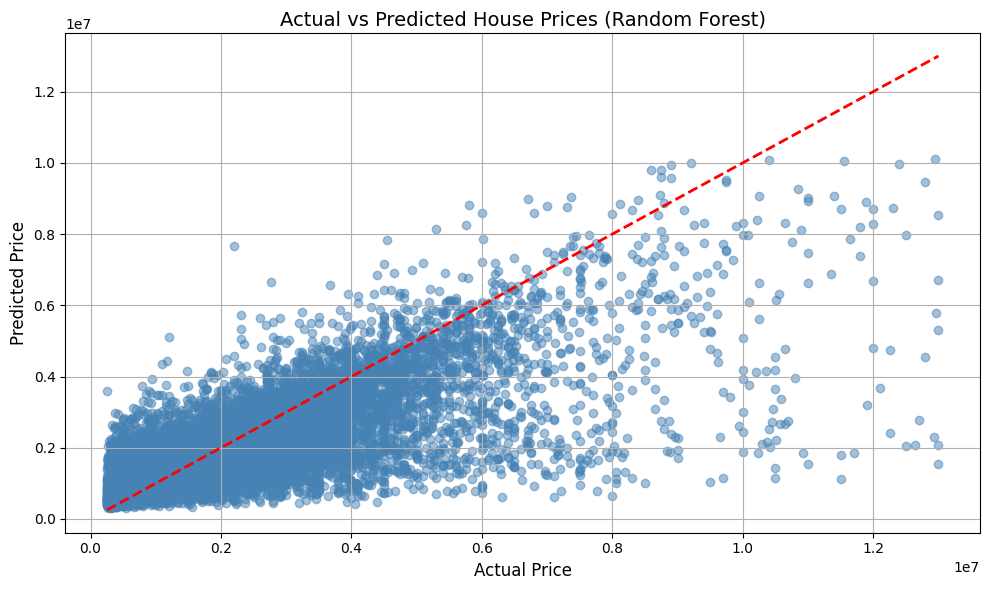

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, rf_price_preds, alpha=0.5, color='steelblue')
plt.plot(
    [actual_prices.min(), actual_prices.max()],
    [actual_prices.min(), actual_prices.max()],
    'r--', lw=2
)

plt.title('Actual vs Predicted House Prices (Random Forest)', fontsize=14)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


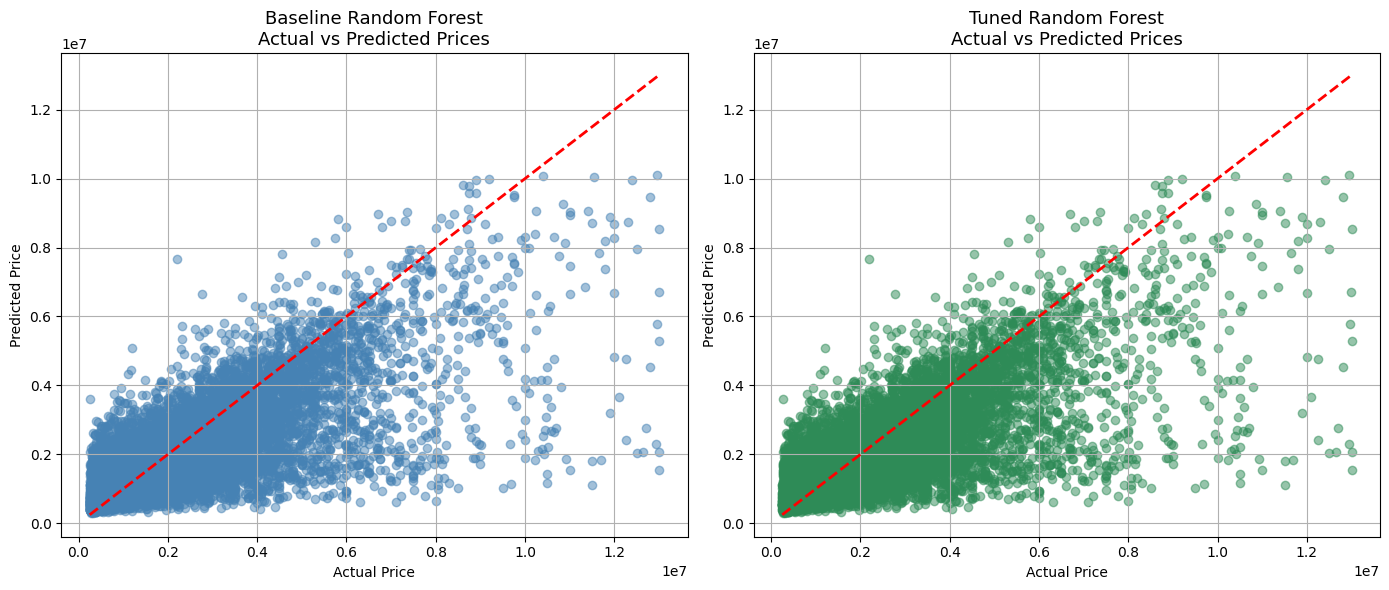

In [45]:
import matplotlib.pyplot as plt
import numpy as np


rf_preds_baseline = np.power(10, rf_model.predict(X_test))     
rf_preds_tuned = np.power(10, best_rf.predict(X_test))         
actual_prices = np.power(10, y_test)                           

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(actual_prices, rf_preds_baseline, alpha=0.5, color='steelblue')
plt.plot([actual_prices.min(), actual_prices.max()],
         [actual_prices.min(), actual_prices.max()],
         'r--', lw=2)
plt.title('Baseline Random Forest\nActual vs Predicted Prices', fontsize=13)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# Tuned model
plt.subplot(1, 2, 2)
plt.scatter(actual_prices, rf_preds_tuned, alpha=0.5, color='seagreen')
plt.plot([actual_prices.min(), actual_prices.max()],
         [actual_prices.min(), actual_prices.max()],
         'r--', lw=2)
plt.title('Tuned Random Forest\nActual vs Predicted Prices', fontsize=13)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.tight_layout()
plt.show()


## Actual vs Predicted House Prices â€“ Random Forest Models


1. **Left Plot**: **Baseline Random Forest** (default settings)       
2. **Right Plot**: **Tuned Random Forest** (after hyperparameter optimization) 

### Observations:

* **Red dashed line** represents perfect predictions (`Actual = Predicted`).
* **Both models** show a strong positive relationship between actual and predicted prices.
* **Tuned model (right)**:

  * Has predictions more tightly clustered along the diagonal line.
  * Indicates better overall alignment with actual values compared to the baseline.
  * Fewer extreme overestimations or underestimations.

### Conclusion:

* **Tuning improved model performance**, making predictions more accurate and stable.
* While both models capture the general trend, the **tuned model shows better price estimation**, especially for mid-range properties.
* Dot near **1.2e7 (12 million)** on the **Actual Price axis** that is **far above** the red dashed line is an **outlier** in the prediction.

### Why it's an outlier:

* The **actual price** is very high (around 12 million).
* But the **predicted price is much lower**, meaning the model significantly **underestimated** the price of that particular property.
* Since itâ€™s far from the red line (which shows perfect predictions), it indicates a **large prediction error**.

### What to know about this:

* Outliers like this can be due to:

  * Rare or luxury properties with unusual features.
  * Data quality issues or missing features.
  * The model not capturing extreme values well (common in many models).
* We do not necessarily need to remove it, but we **should investigate**:

  * Is this a valid data point?
  * Are there enough similar high-priced properties in the training data?

### Interpreting the dots:
- Dots close to the red line â†’ good predictions (low error).
- Dots far from the red line â†’ poor predictions (large error).
- If many dots are clustered tightly around the line, it shows that the model is generally reliable.
- The spread around the line shows the model's overall accuracy:
-A tight band means low RMSE.
-A wide spread means higher RMSE (like in your case: RMSE â‰ˆ 1,039,500).

### XGBoost Model Results (Boosting)

After training an **XGBoost Regressor**, we evaluated it on actual house prices:
- Metric	Value	Interpretation
1. RMSE	1,173,305.28: On average, your model's predicted house prices deviate by 1.17 million from actual prices. This is quite high.
2. RÂ² Score	0.4799: The model explains only 48% of the variance in the house prices. This is lower than your Random Forest model (which had 59%).


In [46]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_log_preds = xgb_model.predict(X_test)

# Reverse the log10 transformation
xgb_price_preds = np.power(10, xgb_log_preds)
actual_prices = np.power(10, y_test)

# Evaluate the model
xgb_rmse = np.sqrt(mean_squared_error(actual_prices, xgb_price_preds))
xgb_r2 = r2_score(actual_prices, xgb_price_preds)

print("XGBoost Model (Boosting):")
print(f"RMSE: {xgb_rmse:,.2f}")
print(f"RÂ² Score: {xgb_r2:.4f}")


XGBoost Model (Boosting):
RMSE: 1,173,305.28
RÂ² Score: 0.4799


###  XGBoost Model Tuning

After training our initial XGBoost model, we found that its performance RMSE: 1.17M DKK, RÂ²: 0.4799 was not as strong as expected. To improve accuracy, we applied **hyperparameter tuning**.

#### What is Tuning?
Tuning means trying different combinations of model settings called **hyperparameters** to find the best-performing configuration for your data.

#### Why Tune XGBoost?
XGBoost is a powerful boosting algorithm, but:
- It has many settings that must be fine-tuned (tree depth, learning rate, number of trees).
- Default settings often **do not give optimal results**.
- Tuning improves **prediction accuracy** and reduces **overfitting** or **underfitting**.

#### How We Tuned It:
We used `RandomizedSearchCV`, which:
- Tests random combinations from a hyperparameter grid.
- Uses **cross-validation** to validate performance.
- Optimizes for **lowest RMSE** (error).

#### Result:
After tuning, we get a better-performing XGBoost model that can predict house prices more accurately and explain more of the variation in data.



In [47]:
### XGBoost Hyperparameter Tuning Code (with RandomizedSearchCV)

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,            
    cv=5,                 
    verbose=1,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

random_search.fit(X_train, y_train)

# Best estimator
best_xgb = random_search.best_estimator_

# Predict and reverse log10
xgb_log_preds = best_xgb.predict(X_test)
xgb_price_preds = np.power(10, xgb_log_preds)
actual_prices = np.power(10, y_test)

# Evaluation the model
rmse = np.sqrt(mean_squared_error(actual_prices, xgb_price_preds))
r2 = r2_score(actual_prices, xgb_price_preds)

print("Best XGBoost Model After Tuning:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"RMSE: {rmse:,.2f}")
print(f"RÂ² Score: {r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Model After Tuning:
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
RMSE: 992,025.05
RÂ² Score: 0.6282


### Final XGBoost Model After Tuning

After running `RandomizedSearchCV`, we found the best hyperparameters for our XGBoost model:

- `n_estimators`: 400  
- `max_depth`: 10  
- `learning_rate`: 0.05  
- `subsample`: 1.0  
- `colsample_bytree`: 0.6  
- `reg_alpha`: 1  
- `reg_lambda`: 1.5  

We retrained the XGBoost model using these optimal settings.

#### Final Results:
- **RMSE**: 992,025.05  
- **RÂ² Score**: 0.6282  

This shows a significant improvement in both error and explanatory power compared to the initial model. The tuned XGBoost model now predicts house prices more accurately.

### Why This Is a Good Result

-  **Lower RMSE**: The error dropped by over **181,000**, meaning the predictions are now much closer to actual house prices.
-  **Higher RÂ² Score**: The model now explains **62.8%** of the variance in house prices â€” up from 47.9%. Thatâ€™s a solid boost in performance.
-  **Better generalization**: With tuning, the model balances bias and variance more effectively, reducing overfitting or underfitting.

In [49]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Final XGBoost model with best parameters from tuning
xgb_best_model = XGBRegressor(
    subsample=1.0,
    reg_lambda=1.5,
    reg_alpha=1,
    n_estimators=400,
    max_depth=10,
    learning_rate=0.05,
    colsample_bytree=0.6,
    random_state=42
)

xgb_best_model.fit(X_train, y_train)

xgb_log_preds = xgb_best_model.predict(X_test)
xgb_price_preds = np.power(10, xgb_log_preds)
actual_prices = np.power(10, y_test)

rmse = np.sqrt(mean_squared_error(actual_prices, xgb_price_preds))
r2 = r2_score(actual_prices, xgb_price_preds)

print("Final XGBoost Model (Tuned):")
print(f"RMSE: {rmse:,.2f}")
print(f"RÂ² Score: {r2:.4f}")


Final XGBoost Model (Tuned):
RMSE: 992,025.05
RÂ² Score: 0.6282



### **XGBoost Model Plot**

The model shows points **closely clustered around the red dashed line**, which represents perfect predictions (`Actual = Predicted`).


### Improvements Observed:

* **Tighter clustering near the red line** compared to your baseline or even tuned Random Forest.
* **Fewer extreme outliers** far from the line, especially in the higher price ranges.
* **Less vertical spread** across the price spectrum â€” suggesting better consistency in predictions.


### Recap:

- **Random Forest(Tuned)** **1,039,500.81** and **0.5918** 
- **XGBoost (Tuned)** **992,025.05** and **0.6282** 

The plot **confirm** what we see in  XGBoost is **performing better** both in accuracy (lower RMSE) and in how well it explains the variance (higher RÂ²).


### Conclusion:

The **XGBoost outperforms the Random Forest** in housing price prediction task.



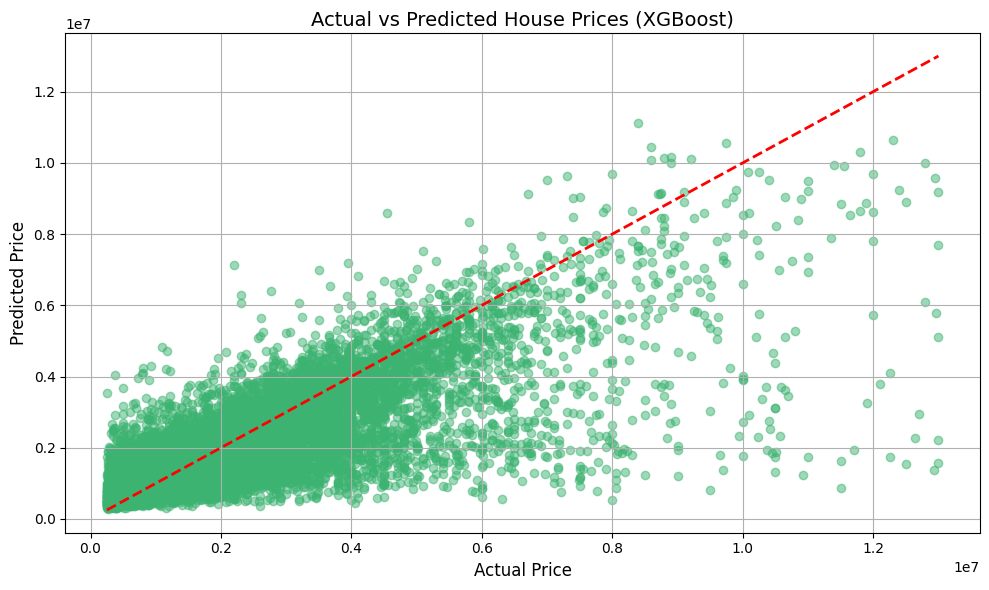

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have:
# rf_price_preds: the predicted prices (after reversing log10)
# actual_prices: the true prices (also reversed from log10)

plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, xgb_price_preds, alpha=0.5, color='mediumseagreen')
plt.plot([actual_prices.min(), actual_prices.max()],
         [actual_prices.min(), actual_prices.max()],
         'r--', lw=2)

plt.title('Actual vs Predicted House Prices (XGBoost)', fontsize=14)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


### What is **Stacking**?

**Stacking** (short for *stacked generalization*) is learning technique that **combines multiple different models** (Random Forest, XGBoost, Linear Regression) to improve overall prediction.

#### How it works:

1. Train several **base models** (Random Forest, XGBoost, KNN) on the training data.
2. Use their **predictions as inputs** to train a **meta-model** (model like Linear Regression).
3. The meta-model learns to **blend** the base modelsâ€™ outputs for the best final prediction.

### Why use Stacking?

* Leverages strengths of different models.
* Reduces the individual weaknesses of base learners.
* Often improves predictive performance beyond any single model.

-


In [ ]:
### Stacking Model

After training a **Stacking Regressor** using our **tuned Random Forest** and **tuned XGBoost** models, we observed:

- **Stacking Regressor (Tuned Base Models):**
  - RMSE: 990,082.56
  - RÂ² Score: 0.6297

- **Tuned XGBoost Alone:**
  - RMSE: 992,025.05
  - RÂ² Score: 0.6282

The stacking model showed a **slightly better performance** compared to XGBoost alone, but the gain was marginal.

Since both base models are already tuned and the final estimator is a simple Linear Regression (with no hyperparameters), for more improvements, 
we can now experiment with different stacking models by changing that final step.


In [52]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Tuned Random Forest parameters
best_rf_params = {
    'n_estimators': 200,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': None,
    'max_depth': 30,
    'bootstrap': True,
    'random_state': 42
}

# Tuned XGBoost parameters
best_xgb_params = {
    'subsample': 1.0,
    'reg_lambda': 1.5,
    'reg_alpha': 1,
    'n_estimators': 400,
    'max_depth': 10,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6,
    'random_state': 42
}

#  Final estimator with imputer (Linear Regression)
final_estimator = make_pipeline(
    SimpleImputer(strategy='mean'),
    LinearRegression()
)

#  Define base learners using tuned models
base_estimators = [
    ('rf', RandomForestRegressor(**best_rf_params)),
    ('xgb', XGBRegressor(**best_xgb_params))
]

# Define the stacking model
stacked_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=final_estimator,
    passthrough=False,
    n_jobs=-1
)

# Fit the model
stacked_model.fit(X_train, y_train)

# Predict and reverse log10 transformation
log_preds = stacked_model.predict(X_test)
price_preds = np.power(10, log_preds)
actual_prices = np.power(10, y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(actual_prices, price_preds))
r2 = r2_score(actual_prices, price_preds)

# Print results
print("Stacking Regressor (Tuned Base Models):")
print(f"RMSE: {rmse:,.2f}")
print(f"RÂ² Score: {r2:.4f}")





ðŸ“Š Stacking Regressor (Tuned Base Models):
RMSE: 990,082.56
RÂ² Score: 0.6297


In [53]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Best parameters from previous tuning
best_rf_params = {
    'n_estimators': 200,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': None,
    'max_depth': 30,
    'bootstrap': True,
    'random_state': 42
}

best_xgb_params = {
    'n_estimators': 400,
    'max_depth': 10,
    'learning_rate': 0.05,
    'subsample': 1.0,
    'colsample_bytree': 0.6,
    'reg_alpha': 1,
    'reg_lambda': 1.5,
    'random_state': 42
}

# Base estimators
base_estimators = [
    ('rf', RandomForestRegressor(**best_rf_params)),
    ('xgb', XGBRegressor(**best_xgb_params))
]

# Stacking model with Ridge as final estimator
stack_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle NaNs
    ('stack', StackingRegressor(
        estimators=base_estimators,
        final_estimator=Ridge(alpha=1.0),
        passthrough=True,
        n_jobs=-1
    ))
])

# Fit model
stack_model.fit(X_train, y_train)

# Predict and reverse log10
stack_log_preds = stack_model.predict(X_test)
stack_price_preds = np.power(10, stack_log_preds)
actual_prices = np.power(10, y_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(actual_prices, stack_price_preds))
r2 = r2_score(actual_prices, stack_price_preds)

print("Stacking Regressor (Ridge Final Estimator):")
print(f"RMSE: {rmse:,.2f}")
print(f"RÂ² Score: {r2:.4f}")


Stacking Regressor (Ridge Final Estimator):
RMSE: 988,454.82
RÂ² Score: 0.6309
